<div class="alert alert-block alert-success">
<b>Reviewer's comment 4</b> <a class="tocSkip"></a>

I checked your presentation, good work! All right now. Good luck in the next project :)
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 3</b> <a class="tocSkip"></a>

You forget to make your presentation public, so I can't get an access :(
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Hello again! You made very good fixes, but I still can't get an access to your presentation. Please, upload it on your google drive, make it public and give me a link :)
</div>

<b>Reviewer's comment</b>

Hello, Yosef! My name is Andrey Isupov. I checked your project. You did a very good job on the project. But there are few things that need fix. I think it is not so difficult for you and you will quickly cope with it. Good luck :)

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Sample text
</div>

# Project description
I’ve decided to open a small robot-run cafe in Los Angeles. The project is promising but expensive, so you and my partners decide to try to attract investors. They’re interested in the current market conditions—will I be able to maintain my success when the novelty of robot waiters wears off?
I'm an analytics guru, so my partners have asked you to prepare some market research. i have open-source data on restaurants in LA.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Thanks for the description
</div>

# Loading libreries the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import median

In [2]:
import warnings

warnings.filterwarnings("ignore")

# Uploading the data

In [3]:
resturantData = pd.read_csv('/datasets/rest_data_us.csv')

# Preparing the data for analyze

In [4]:
resturantData.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 2.4 MB


In [5]:
resturantData.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [6]:
resturantData.describe()

,id,number
count,9651.000000,9651.000000
mean,16611.000000,43.695161
std,2786.148058,47.622874
min,11786.000000,1.000000
25%,14198.500000,14.000000
50%,16611.000000,27.000000
75%,19023.500000,46.000000
max,21436.000000,229.000000


Great now we have a nice view on the data and we can asume that there's some outliers.
(the mean value is ~44 will the max value is 229 the wolud imply).

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good data review
</div>

# Optimizing the data

In [7]:
resturantData['object_type'].nunique()

6

In [8]:
resturantData['object_type'] = resturantData['object_type'].astype('category')

In [9]:
resturantData.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null category
number         9651 non-null int64
dtypes: category(1), int64(2), object(3)
memory usage: 1.8 MB


Now this is nice, the file is lighter by 25%.

# Checking for missing values

In [10]:
resturantData.isna().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [11]:
resturantData[resturantData['chain'].isna()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [12]:
print('The chunk of the missing data is from the whole data is {:%}'.format(len(resturantData[resturantData['chain'].isna()])/ len(resturantData['chain'])))

The chunk of the missing data is from the whole data is 0.031085%


We can ommit this data it is Negligible (mayebe data misstyped or somthing).

In [13]:
resturantData.dropna(inplace=True)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Right decision
</div>

In [14]:
resturantData.isna().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

There is no missing values now.

# Checking for duplicates

In [15]:
resturantData.duplicated().sum()

0

There is no duplicates.

The data is clean and read for analysis.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice data preparation. Now let's start our data analysis :)
</div>

# Analyze the data

In [16]:
resturantData.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [17]:
resturantData['object_type'].unique()

[Cafe, Restaurant, Fast Food, Bakery, Bar, Pizza]
Categories (6, object): [Cafe, Restaurant, Fast Food, Bakery, Bar, Pizza]

In the next stage I'll find out which resturant is established chain and split the resturant into two types.

In [18]:
not_established = resturantData[resturantData['chain'] == False]
established = resturantData[resturantData['chain'] == True]

In [19]:
Cafe = established[established['object_type'] == 'Cafe']
len(established[established['object_type'] == 'Cafe']) / len(established['object_type'])

0.07236126224156691

7.23% of the established chain are Cafe.

In [20]:
Restaurant = established[established['object_type'] == 'Restaurant']
len(established[established['object_type'] == 'Restaurant']) / len(established['object_type'])

0.6235038084874864

62.35% are resturants.

In [21]:
Fast_Food = established[established['object_type'] == 'Fast Food']
len(established[established['object_type'] == 'Fast Food']) / len(established['object_type'])

0.1645810663764962

16.4% are fast food chains.

In [22]:
Bakery = established[established['object_type'] == 'Bakery']
len(established[established['object_type'] == 'Bakery']) / len(established['object_type'])

0.07698585418933623

7.69% are bakeries.

In [23]:
Bar = established[established['object_type'] == 'Bar']
len(established[established['object_type'] == 'Bar']) / len(established['object_type'])

0.020946681175190423

2.1% are Bars.

In [24]:
Pizza = established[established['object_type'] == 'Pizza']
len(established[established['object_type'] == 'Pizza']) / len(established['object_type'])

0.041621327529923834

4.16 are pizza chain.

In [25]:
len(established) /(len(established)+ len(not_established))

0.38101160862354894

The part of established chain is 38.1%.

In [26]:
array = np.array([len(Cafe), len(Restaurant), len(Fast_Food), len(Bakery), len(Bar), len(Pizza)])

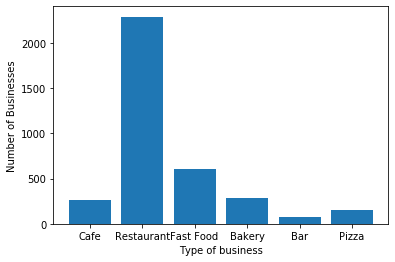

In [27]:
plt.xlabel('Type of business')
plt.ylabel('Number of Businesses')
plt.bar(['Cafe', 'Restaurant', 'Fast Food', 'Bakery', 'Bar', 'Pizza'], array)

plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Could you add x and y axis labels and a title, please
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Good!
</div>

Most of the values are Restaurant and than come the Fast Food in seconde place.

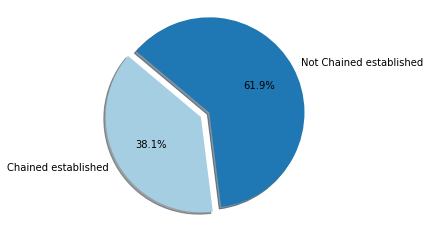

In [28]:
labels = ['Chained established', 'Not Chained established']
sizes = [len(established), len(not_established)]
colors = sns.color_palette("Paired")
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pie chart will be the best here, because it can help us to look at the proportions closer 
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Beautiful
</div>

The number of restaurant that are not chain established is higher, most of the market is consist by little restaurant.

In [29]:
established['object_type'].value_counts().sort_values(ascending=False)

Restaurant    2292
Fast Food      605
Bakery         283
Cafe           266
Pizza          153
Bar             77
Name: object_type, dtype: int64

Restaurant that is typcally established. Restaurant are the most common in the first place.

In [30]:
established.groupby('object_type', as_index=False).agg({'number':'mean'}).sort_values(by='number' ,ascending=False)

,object_type,number
5,Restaurant,44.856021
1,Bar,40.259740
3,Fast Food,38.089256
2,Cafe,25.917293
4,Pizza,25.529412
0,Bakery,21.773852


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job
</div>

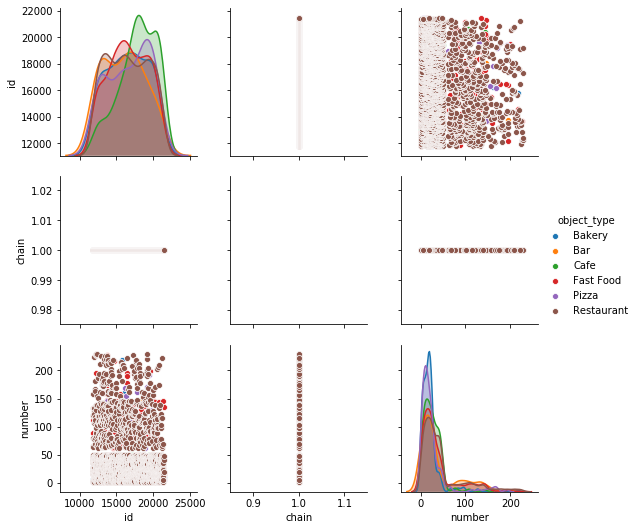

In [31]:
sns.pairplot(established, hue='object_type')

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

We can add an alpha parameter here to make our dots translucent. So we can find the clusters of dots much easier
</div>

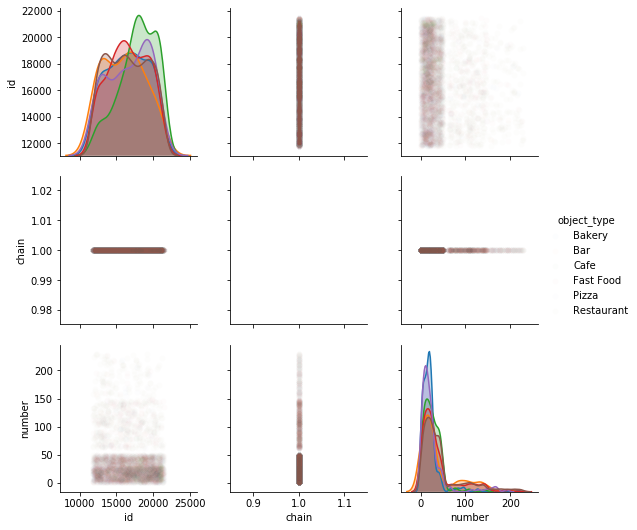

In [32]:
# Reviewer's code
sns.pairplot(established, hue='object_type', plot_kws={'alpha': 0.01})

As you can see bars as the second place in the number of chair, but bars alos as the lowest number of established chain.
Bar seem to be have a lot of chairs at their place (peoples like to sit down and drink their beer).
Resturant also has a lot of chair at their place, I dont blame the costumer I like to eat while I sit too.
Regardless to the way people eat and drink there's a nerative of which place surve the costumer porpuse what is the porpuse,
for example if I want to spare some time and take my time while I'm eating I would be better hang out in thos place I've mentioned earlier But if I want to grab somthing and go most likly I'll visit places like Cafe ,Pizza ,and Bakery.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

👍
</div>

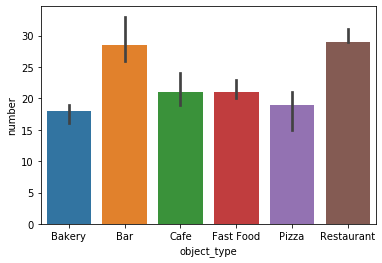

In [33]:
ax = sns.barplot(x="object_type", y="number", data=resturantData, estimator=median) 

It can be shown in the graph above that "Restaurant" and "Bar" has the highest number of seats (by average).

In [34]:
def super_func(address):
    
    clean_address = []
    for word in address.split()[1:]:
        if word == "#" or word[0] == "#":
            break
        clean_address.append(word)
        if word in ("BLVD", "ST", "AVE", "DR", "RD", "STE") :
            break
        
    
    return " ".join(clean_address)

In [35]:
resturantData['street'] = resturantData['address'].apply(super_func)

In [36]:
topTenRetaurnat = resturantData.groupby('street', as_index=False).agg({'object_type':'count', 'number':'sum'}).sort_values(by='object_type', ascending=False).head(10)

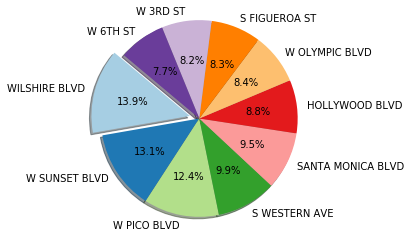

In [37]:
labels = np.array(topTenRetaurnat['street'])
sizes = np.array(topTenRetaurnat['object_type'])
colors = sns.color_palette("Paired")
explode = (0.1, 0, 0, 0, 0, 0, 0, 0 ,0 ,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Seems like WILSHRIE BLDV street contain to largest number of restaurant.

In [38]:
streetWithOneRestaurnat = (resturantData.groupby('street', as_index=False).agg({'object_type':'count'}).sort_values(by='object_type', ascending=True))
streetWithOneRestaurnat = streetWithOneRestaurnat[streetWithOneRestaurnat['object_type'] == 1]
len(streetWithOneRestaurnat)

434

There are 434 streets with one restaurant.

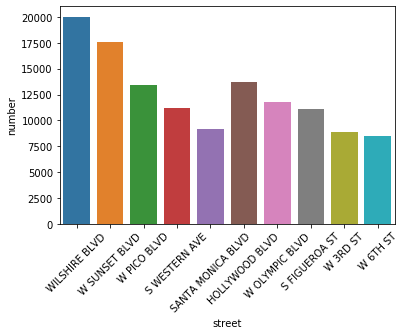

In [39]:
plt.xticks(rotation=45)
sns.barplot(x='street', y='number', data=topTenRetaurnat)
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very beautiful
</div>

There obviously a trend that can be drawn be looking at the two graphh above. The more restaurant the street contain the more chair will be.

The most common chain are restaurant and fast-food store so my recomendation is:

1) open up a restaurant because they have big chunk of the market(They are 62.35% of the market).

2) Moreove we should put 40 chair because that the average number of chair for restaurant and we want to make the place effactive and proffitable but not to big and empty. also the waiters need to be able to handle all tables correctly beacuse there will be no robots to surve.

3) It should be where there are alot of crowd to attract as many costumer(Like in WILSHRIE BLDV street).

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Thanks for the informative conclusion
</div>

Presentaion: https://drive.google.com/file/d/19rrqSHBQoegliPIfDNAYN6FR7mQTSS2-/view?usp=sharing

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

I can't get an access to this file :( Please, upload your presentation on google drive, make it public and put a link here
</div>